# Dataset details:
Dataset Title = Ratings and reviews for Movies/TV products from Amazon

Number of reviews = 3,410,019

Date range = 1997-12-02 to 2018-10-01

Size of dataset = 791MB

source: https://nijianmo.github.io/amazon/index.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json("Movies_and_TV_5.json.gz", compression='gzip', lines=True)

In [3]:
df_org = df 
# Save raw data backup copy to df_org

In [4]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,So sorry I didn't purchase this years ago when...,Amazing!,1352419200,NaN,NaN
1,5,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,NaN,NaN
2,5,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"I have seen X live many times, both in the ear...",A great document of a great band,1114041600,11,NaN
3,5,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"I was so excited for this! Finally, a live co...",YES!! X LIVE!!,1112745600,5,NaN
4,5,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,X is one of the best punk bands ever. I don't ...,X have still got it,1291334400,5,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410019 entries, 0 to 3410018
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         int64 
 1   verified        bool  
 2   reviewTime      object
 3   reviewerID      object
 4   asin            object
 5   style           object
 6   reviewerName    object
 7   reviewText      object
 8   summary         object
 9   unixReviewTime  int64 
 10  vote            object
 11  image           object
dtypes: bool(1), int64(2), object(9)
memory usage: 289.4+ MB


In [6]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

# Data Cleaning

In [7]:
# Check for null entries
df.isnull().sum()
# Will be dropping null for column 'styles' ~5% of data later

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style              174207
reviewerName           82
reviewText           1581
summary               640
unixReviewTime          0
vote              2768010
image             3403048
dtype: int64

In [8]:
df['style'].value_counts() 

{'Format:': ' DVD'}                                1645586
{'Format:': ' Amazon Video'}                       1027966
{'Format:': ' Blu-ray'}                             335181
{'Format:': ' Prime Video'}                         158950
{'Format:': ' VHS Tape'}                             61821
{'Format:': ' HD DVD'}                                1475
{'Format:': ' DVD-R'}                                 1428
{'Format:': ' Theatrical Release'}                     801
{'Format:': ' Audio CD'}                               657
{'Format:': ' DVD-ROM'}                                474
{'Format:': ' UMD for PSP'}                            352
{'Format:': ' Amazon Instant Video'}                   250
{'Format:': ' Electronics'}                            116
{'Format:': ' Hardcover'}                              107
{'Format:': ' Interactive DVD'}                         97
{'Format:': ' Paperback'}                               86
{'Format:': ' Laser Disc'}                              

In [9]:
df['reviewText']

0          So sorry I didn't purchase this years ago when...
1          Believe me when I tell you that you will recei...
2          I have seen X live many times, both in the ear...
3          I was so excited for this!  Finally, a live co...
4          X is one of the best punk bands ever. I don't ...
                                 ...                        
3410014    The singing parts are very good as expected fr...
3410015    This recording of the 2015 production by the M...
3410016    I do not wish to write a review about this rel...
3410017                                       It was a gift.
3410018    This Otello originates from the Salzburg Festi...
Name: reviewText, Length: 3410019, dtype: object

In [10]:
df['reviewText'][0]

"So sorry I didn't purchase this years ago when it first came out!!  This is very good and entertaining!  We absolutely loved it and anticipate seeing it repeatedly.  We actually wore out the cassette years back, so we also purchased this same product on cd.  Best purchase we made out of all!  Would purchase on dvd if we could find one."

In [11]:
# Drop null values from these columns
df = df.dropna(subset=['style','reviewerName', 'reviewText', 'summary'])

In [12]:
# Drop these columns
df.drop(['vote','image','unixReviewTime'],axis=1,inplace=True)

C:\Users\eugen\AppData\Local\Temp\ipykernel_6732\38963360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['vote','image','unixReviewTime'],axis=1,inplace=True)


In [13]:
# Check if data is cleaned
df.isnull().sum()

overall         0
verified        0
reviewTime      0
reviewerID      0
asin            0
style           0
reviewerName    0
reviewText      0
summary         0
dtype: int64

In [14]:
duplicated_reviews = df[df.duplicated(['reviewText'], keep=False)]

In [15]:
duplicated_reviews.info()
# We have about 860k duplicates of text review
# lets remove them, which is about 25% of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868955 entries, 29 to 3410018
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   overall       868955 non-null  int64 
 1   verified      868955 non-null  bool  
 2   reviewTime    868955 non-null  object
 3   reviewerID    868955 non-null  object
 4   asin          868955 non-null  object
 5   style         868955 non-null  object
 6   reviewerName  868955 non-null  object
 7   reviewText    868955 non-null  object
 8   summary       868955 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 60.5+ MB


In [16]:
df = df.drop_duplicates(subset=['reviewText'])

In [17]:
df.info()
# We still have 2.5 million entries after removing 25% of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2560768 entries, 0 to 3410016
Data columns (total 9 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   overall       int64 
 1   verified      bool  
 2   reviewTime    object
 3   reviewerID    object
 4   asin          object
 5   style         object
 6   reviewerName  object
 7   reviewText    object
 8   summary       object
dtypes: bool(1), int64(1), object(7)
memory usage: 178.3+ MB


In [18]:
type(df['reviewTime'][0]) 
# time in str format, lets change it to datetime object next

str

In [19]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%m %d, %Y')

In [20]:
type(df['reviewTime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
df['reviewTime'].describe()

C:\Users\eugen\AppData\Local\Temp\ipykernel_6732\3300267488.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['reviewTime'].describe()


count                 2560768
unique                   7285
top       2015-02-20 00:00:00
freq                     6021
first     1997-12-02 00:00:00
last      2018-10-01 00:00:00
Name: reviewTime, dtype: object

In [22]:
df = df.reset_index(drop=True)

In [23]:
# For aesthetics purposes
df = df.rename(columns={'overall':'rating','asin':'productID','style':'productType'})

In [24]:
# Clone to another df called df1, will be setting index to date for this df1
# Now df will be a backup and will be working on df1 here onwards
# Note that we still have df_org as the raw data backup copy
df1 = df

In [25]:
df1 = df1.set_index('reviewTime')

In [26]:
df1 = df1.sort_index()

In [27]:
df1

,rating,verified,reviewerID,productID,productType,reviewerName,reviewText,summary
reviewTime,,,,,,,,
1997-12-02,5,False,A28BJ12568I17K,6304123523,{'Format:': ' VHS Tape'},Mire Uno,This TV animation series opened up many disput...,"It arose ""Evangelion Phenomina"" in Japan"
1998-01-03,4,False,A30Q8X8B1S3GGT,6300215695,{'Format:': ' VHS Tape'},Mark Savary,"Here's a semi-remake of ""Holiday Inn"" (1942), ...",Holiday favorite with Bing Crosby and Danny Kaye!
1998-01-03,4,True,A3TQZ521KSRUZ1,B0001NBMEY,{'Format:': ' VHS Tape'},Anthony Scheinman,This verison (which was first made as a theatr...,A version that will keep viewers riveted!
1998-02-05,5,False,A28BJ12568I17K,6303118240,{'Format:': ' VHS Tape'},Mire Uno,Animation by Hayao Miyazaki and one of my favo...,Nostalgy for Japan in 50s
1998-02-24,5,False,A28BJ12568I17K,6304164084,{'Format:': ' VHS Tape'},Mire Uno,Japanese title is Macross and quite long TV an...,Macross: well loved saga in Japan
...,...,...,...,...,...,...,...,...
2018-09-28,4,True,A2TRYG5M981MG8,B01FRCEVDM,{'Format:': ' DVD'},Robert E,I enjoyed it but can't say more so as not to s...,Interesting Movie
2018-09-29,5,True,A1Y5BG2UI932NA,B01HEXXM9G,{'Format:': ' Blu-ray'},Crazzie1,"I must say, this one is a really good one. I'd...",Dont pass it up.
2018-09-29,4,True,A26NCB8P62PZAW,B01GF9N7FE,{'Format:': ' DVD'},S. Karl,Was there a chance that this movie would ever ...,Not for the Oscar crowd.


# Exploratory Data Analysis

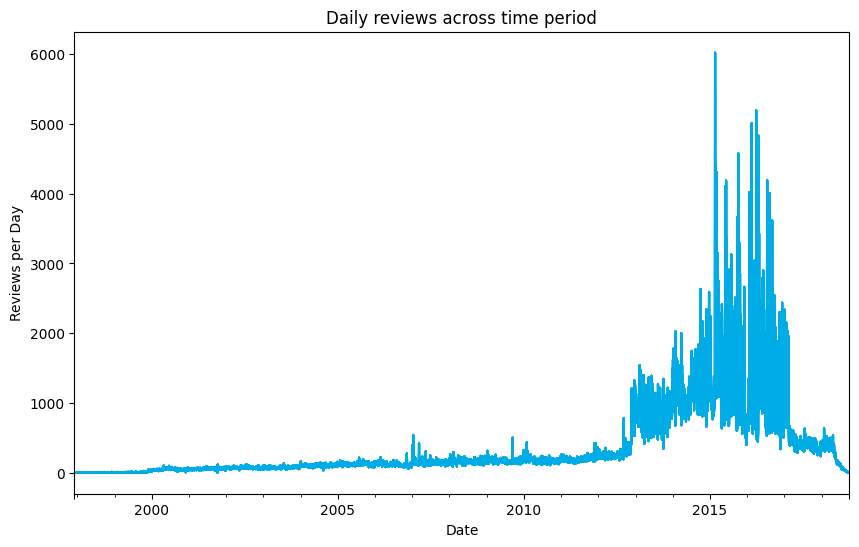

In [28]:
# Line plot to visualize the number of reviews per day across the datetime index
df_count = df1.resample('D').count()
df_count.plot(kind='line', figsize=(10, 6), legend=None, color='#00ace6')
plt.xlabel('Date')
plt.ylabel('Reviews per Day')
plt.title('Daily reviews across time period')
plt.show()

In [29]:
df_count['rating'].max()

6021

In [30]:
most_reviews = df_count['rating'].max()
date_most_reviews = df_count.index[df_count['rating'] == 6021]
# Highest number of reviews made in a day was 6021 reviews
print(f"The highest number of reviews made in a day was {most_reviews} reviews")
print(f"This occurred on {date_most_reviews[0]}")

The highest number of reviews made in a day was 6021 reviews
This occurred on 2015-02-20 00:00:00


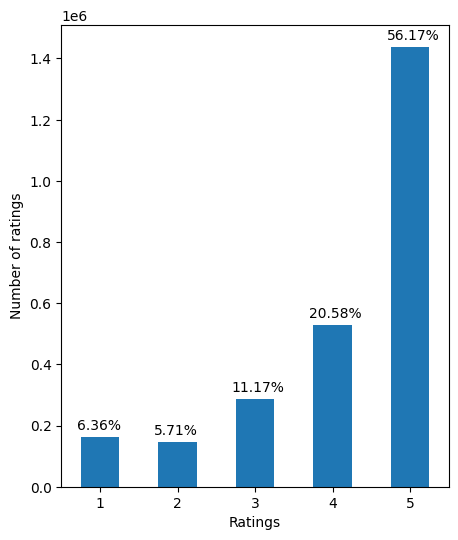

In [31]:
# Barplot to visualize the ratings made by the customers
plt.figure(figsize=(5,6))
rating = df1['rating'].value_counts().sort_index(ascending=False)[::-1]
total_count = len(df1)
ax = rating.plot(kind='bar')
for i,v in enumerate(rating):
    percent = round((v/total_count)*100, 2)
    ax.text(i-0.3, v+25000, str(percent) + '%')
plt.xlabel('Ratings')
plt.ylabel('Number of ratings')
plt.xticks(rotation=0)  
plt.show()

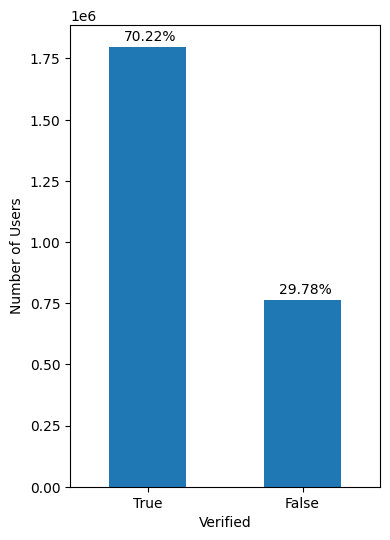

In [32]:
# Barplot to visualize between the verified and not verified users
plt.figure(figsize=(4,6))
rating = df1['verified'].value_counts()
total_count = len(df1)
ax = rating.plot(kind='bar')
for i,v in enumerate(rating):
    percent = round((v/total_count)*100, 2)
    ax.text(i-0.15, v+25000, str(percent) + '%')
plt.xlabel('Verified')
plt.xticks(rotation=0)
plt.ylabel('Number of Users')
plt.show()

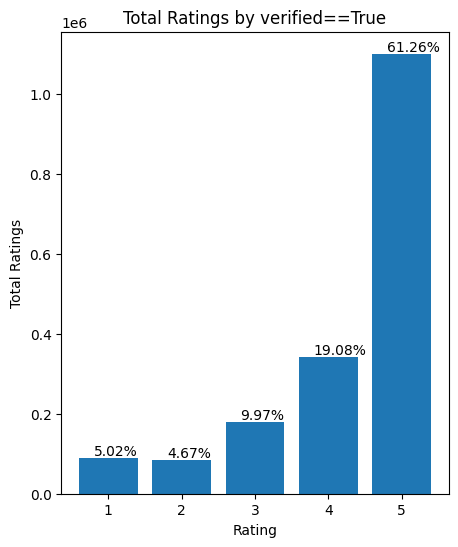

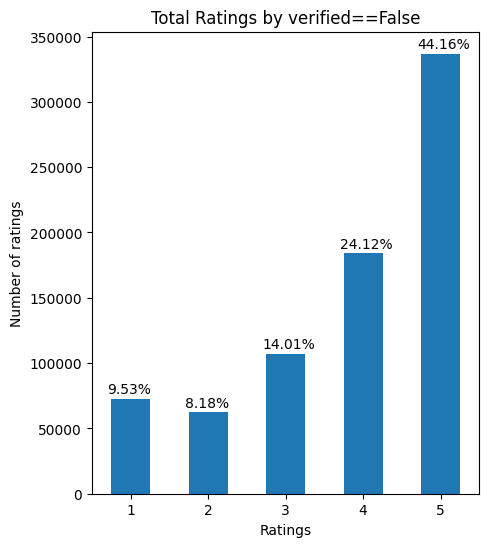

In [33]:
'''
Documentation to elaborate the definition of 'verified review'

A 'verified review' means that the reviewer bought or used the item
on Amazon, and paid a price available to most Amazon shoppers. 
After someone submits a review, Amazon check if they: 
Bought or used the item on Amazon; Paid a price available to most Amazon shoppers.

'''



'''

This visualization checks whether there is any intentional input bias from
non-verified reviewers whereby they could deliberately spam bad ratings (1-2)
to skew to overall rating for the product.

By comparing verified vs non-verified ratings, we can see that the overall
sentiment is less positive for the non-verified ratings


'''


# Perform a visualization on the ratings made by the verified reviews

# Subset the dataframe to only include rows where gender is male
df_true = df1[df1['verified'] == True]

# Group by rating and calculate the sum of total_ratings for each rating
true_ratings = df_true.groupby('rating')['verified'].sum()

# Create a barplot of the male ratings
plt.figure(figsize=(5,6))
plt.bar(true_ratings.index, true_ratings.values)
plt.xlabel('Rating')
plt.ylabel('Total Ratings')
plt.title('Total Ratings by verified==True')

# Add percentage values to each bar
total = sum(true_ratings)
for i, v in enumerate(true_ratings):
    percent = round((v/total)*100, 2)
    plt.text(i+0.8, v+6000, str(percent)+'%')
    
plt.show()




df_false = df1[df1['verified'] == False]
plt.figure(figsize=(5,6))
rating = df_false['rating'].value_counts().sort_index(ascending=False)[::-1]
total_count = len(df_false)
ax = rating.plot(kind='bar')
for i,v in enumerate(rating):
    percent = round((v/total_count)*100, 2)
    ax.text(i-0.3, v+4000, str(percent) + '%')
plt.title('Total Ratings by verified==False')
plt.xlabel('Ratings')
plt.ylabel('Number of ratings')
plt.xticks(rotation=0)  
plt.show()

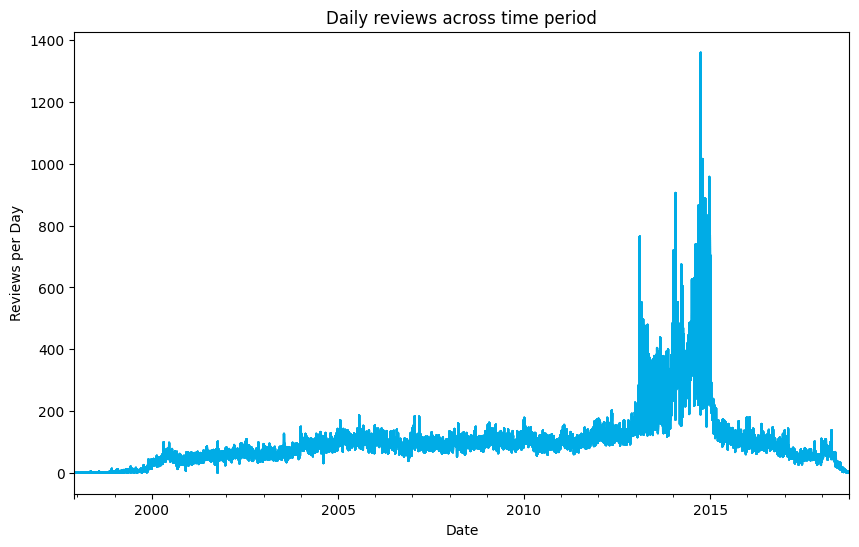

In [34]:
# Line plot to visualize the number of reviews per day across the datetime index
df_false_count = df_false.resample('D').count()
df_false_count.plot(kind='line', figsize=(10, 6), legend=None, color='#00ace6')
plt.xlabel('Date')
plt.ylabel('Reviews per Day')
plt.title('Daily reviews across time period')
plt.show()

In [35]:
df_false_count['rating'].max()

1360

In [36]:
df1.head(2)

,rating,verified,reviewerID,productID,productType,reviewerName,reviewText,summary
reviewTime,,,,,,,,
1997-12-02,5,False,A28BJ12568I17K,6304123523,{'Format:': ' VHS Tape'},Mire Uno,This TV animation series opened up many disput...,"It arose ""Evangelion Phenomina"" in Japan"
1998-01-03,4,False,A30Q8X8B1S3GGT,6300215695,{'Format:': ' VHS Tape'},Mark Savary,"Here's a semi-remake of ""Holiday Inn"" (1942), ...",Holiday favorite with Bing Crosby and Danny Kaye!


# Moving onto NLP

In [52]:
df_nlp = df1[['rating','reviewText']]

In [53]:
df_nlp = df_nlp.loc[df_nlp['rating'] != 3]

In [54]:
df_nlp = df_nlp.reset_index(drop=True)

In [55]:
df_nlp['rating'].value_counts()

5    1438318
4     527109
1     162891
2     146303
Name: rating, dtype: int64

In [56]:
def get_sentiment(rating):
    if rating <= 2:
        return 'neg'
    else:
        return 'pos'

In [57]:
df_nlp['label'] = df_nlp['rating'].apply(get_sentiment)

In [58]:
df_nlp.head()

,rating,reviewText,label
0,5,This TV animation series opened up many disput...,pos
1,4,"Here's a semi-remake of ""Holiday Inn"" (1942), ...",pos
2,4,This verison (which was first made as a theatr...,pos
3,5,Animation by Hayao Miyazaki and one of my favo...,pos
4,5,Japanese title is Macross and quite long TV an...,pos


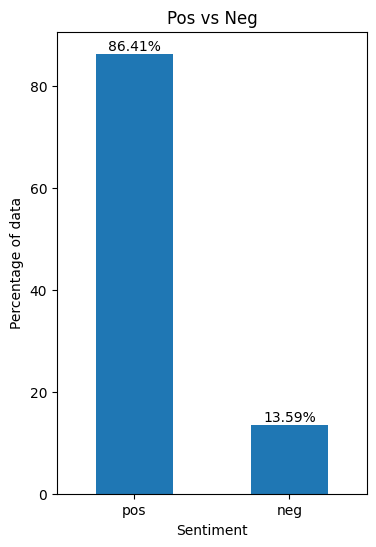

In [66]:
# create the bar plot
plt.figure(figsize=(4,6))
ax = df_nlp['label'].value_counts(normalize=True).mul(100).round(2).plot(kind='bar', rot=0)

# set the x-axis label
ax.set_xlabel('Sentiment')

# set the y-axis label
ax.set_ylabel('Percentage of data')

# set the title of the plot
ax.set_title('Pos vs Neg')

# add a % sign to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# show the plot
plt.show()


# Sentiment Analysis using VADER

In [69]:
# !pip install nltk
# import nltk
# nltk.downloader.download('vader_lexicon')

In [70]:
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# sid = SentimentIntensityAnalyzer()

Computational time taken = 273.23 seconds


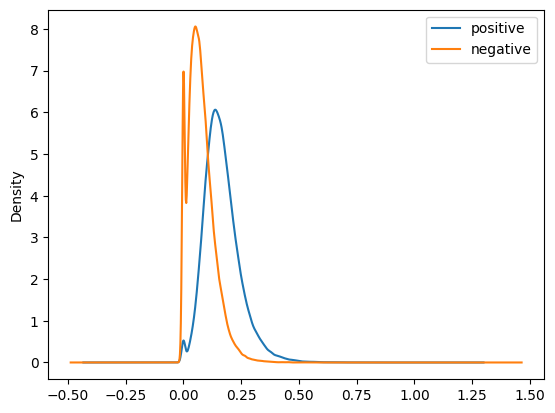

In [95]:
# # This cell takes very long to run

# import time
# start_time = time.time()

# # Testing VADER computational time for a subset of 100k reviews from df_nlp
# testingdf = df_nlp['reviewText'][0:100000].apply(lambda review: {'positive': sid.polarity_scores(review)['pos'], 'negative': sid.polarity_scores(review)['neg']} )

# # convert the resulting series of dictionaries to a dataframe
# testingdf = pd.DataFrame(testingdf.tolist())

# # plot the distribution of positive and negative sentiment scores
# testingdf.plot(kind='density')


# end_time = time.time()
# time_taken = round(end_time-start_time,2)
# print(f'Computational time taken = {time_taken} seconds') 

# Linear Support Vector Classifier for Sentiment Analysis

In [72]:
from sklearn.model_selection import train_test_split

X = df_nlp['reviewText']
y = df_nlp['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),])

start_time = time.time()
# Train the model by feeding the text data through the pipeline
SVC_Model = text_clf.fit(X_train, y_train)  
end_time = time.time()
time_taken = round(end_time-start_time,2)
print(f'Computational time taken = {time_taken} seconds') 

Computational time taken = 79.55 seconds


In [98]:
# Form a prediction set
predictions = SVC_Model.predict(X_test)

In [99]:
# Report the confusion matrix
from sklearn import metrics
svc_metrics = metrics.confusion_matrix(y_test,predictions)
print(svc_metrics)

[[ 65124  27327]
 [ 12142 577794]]


Text(50.722222222222214, 0.5, 'Actual Label')

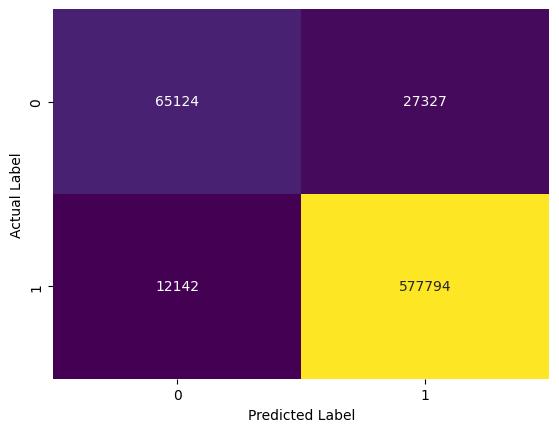

In [100]:
heatmap = sns.heatmap(svc_metrics, annot=True, fmt='g', cmap='viridis', cbar=False)
heatmap.set_xlabel('Predicted Label')
heatmap.set_ylabel('Actual Label')

In [101]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.84      0.70      0.77     92451
         pos       0.95      0.98      0.97    589936

    accuracy                           0.94    682387
   macro avg       0.90      0.84      0.87    682387
weighted avg       0.94      0.94      0.94    682387



In [102]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.9421603869944768


In [103]:
# # This code is to save the trained SVC_Model
# import pickle

# # save the SVC_Model object to a file
# with open('SVC_Model.pickle', 'wb') as f:
#     pickle.dump(SVC_Model, f)

In [ ]:
# # This code is to load the trained SVC_Model
# import pickle

# # load the SVC_Model object from a file
# with open('SVC_Model.pickle', 'rb') as f:
#     SVC_Model = pickle.load(f)
#     f.close()

# LSTM for Sentiment Analysis

## Data preprocessing for input to LSTM 

In [106]:
df_nlp['reviewText']

0          This TV animation series opened up many disput...
1          Here's a semi-remake of "Holiday Inn" (1942), ...
2          This verison (which was first made as a theatr...
3          Animation by Hayao Miyazaki and one of my favo...
4          Japanese title is Macross and quite long TV an...
                                 ...                        
2274616    I enjoyed it but can't say more so as not to s...
2274617    I must say, this one is a really good one. I'd...
2274618    Was there a chance that this movie would ever ...
2274619    Susan Sarandon is a widow who just wants to sh...
2274620    Me Natalie was released in 1969. It starred Pa...
Name: reviewText, Length: 2274621, dtype: object

In [159]:
text = df_nlp['reviewText'].tolist()

In [162]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Remove stop words
text = [' '.join(word for word in sentence.split() if word not in stop_words) for sentence in text]

In [163]:
text_label = df_nlp['label'].replace({'pos': 1, 'neg': 0})
text_label = np.array(text_label)

In [164]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalAveragePooling1D, Flatten, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

start_time = time.time()
# define the maximum number of words to consider in the vocabulary
MAX_WORDS = 10000

# define the maximum length of a sequence (in words)
MAX_SEQ_LEN = 50
oov_tok = "<OOV>"
trunc_type='post'
padding_type='post'

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token=oov_tok)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

# pad the sequences to a fixed length
data = pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding=padding_type, truncating=trunc_type)

# convert the target labels to a numpy array
labels = np.array(text_label)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)


end_time = time.time()
time_taken = round(end_time-start_time,2)
print(f'Computational time taken = {time_taken} seconds') 

Computational time taken = 116.23 seconds


In [165]:
model = tf.keras.Sequential([
# YOUR CODE HERE. KEEP THIS OUTPUT LAYER INTACT OR TESTS MAY FAIL

tf.keras.layers.Embedding(MAX_WORDS, 128, input_length=MAX_SEQ_LEN),
# tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
# tf.keras.layers.GlobalAveragePooling1D(),
# tf.keras.layers.Flatten(),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Dense(1, activation='sigmoid')
])


# compile the model and specify the loss function and optimization algorithm
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [166]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 50, 128)           1280000   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 32)                18560     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 1,299,649
Trainable params: 1,299,649
Non-trainable params: 0
_________________________________________________________________


In [178]:
from tensorflow.keras.callbacks import EarlyStopping
from tqdm.keras import TqdmCallback

num_epochs = 10
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# compile the model and specify the loss function and optimization algorithm
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model on the training data
LSTM_Model = model.fit(X_train, y_train, epochs=num_epochs, batch_size=16, validation_data=(X_test, y_test), 
                        callbacks=[early_stop])


Epoch 1/10
99515/99515 [==============================] - 964s 10ms/step - loss: 0.1629 - accuracy: 0.9385 - val_loss: 0.1599 - val_accuracy: 0.9387
Epoch 2/10
99515/99515 [==============================] - 942s 9ms/step - loss: 0.1527 - accuracy: 0.9425 - val_loss: 0.1615 - val_accuracy: 0.9385
Epoch 3/10
99515/99515 [==============================] - 949s 10ms/step - loss: 0.1474 - accuracy: 0.9444 - val_loss: 0.1668 - val_accuracy: 0.9379
Epoch 4/10
99515/99515 [==============================] - 975s 10ms/step - loss: 0.1438 - accuracy: 0.9460 - val_loss: 0.1660 - val_accuracy: 0.9387


In [179]:
# evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', accuracy)

Test accuracy: 0.9387092590332031


In [180]:
# evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy:.2f}')

# make predictions on the test data
y_pred = model.predict(X_test)

# convert the predicted probabilities to binary predictions
y_pred = (y_pred > 0.5).astype(int)

# calculate the F1 score
from sklearn.metrics import f1_score
f1score = f1_score(y_test, y_pred)
print(f'F1 score: {f1score:.2f}')


Test accuracy: 0.94
F1 score: 0.97


In [181]:
# # save the model to a file
# model.save('LSTM_Model.h5')

In [ ]:
# from tensorflow.keras.models import load_model

# # load the saved model
# model = load_model('LSTM_Model.h5')

In [182]:
from sklearn.metrics import confusion_matrix

# get predicted labels for the test set
y_pred = model.predict(X_test)

# convert predicted probabilities to binary labels
y_pred = np.round(y_pred)

# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)


[[ 62463  30542]
 [ 11282 578100]]


In [183]:
# Print a classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.67      0.75     93005
           1       0.95      0.98      0.97    589382

    accuracy                           0.94    682387
   macro avg       0.90      0.83      0.86    682387
weighted avg       0.94      0.94      0.94    682387



Text(50.722222222222214, 0.5, 'Actual Label')

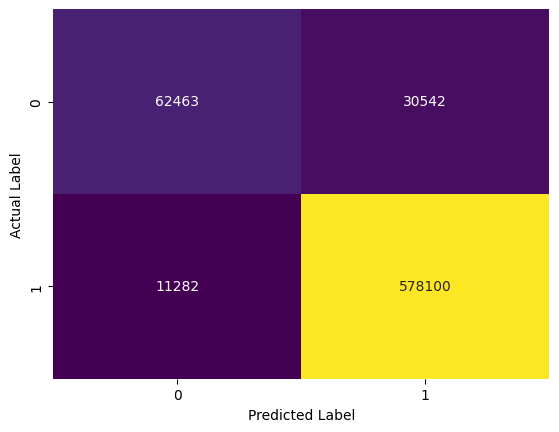

In [184]:
heatmap = sns.heatmap(cm, annot=True, fmt='g', cmap='viridis', cbar=False)
heatmap.set_xlabel('Predicted Label')
heatmap.set_ylabel('Actual Label')